# Demonstrate Setting an Orientation

This notebook will demonstrate getting an orientation from the PyMol Desktop software and then using it with binderized PyMol.  
This builds on [Demo of Getting a Structure and Producing an Image](notebooks/demo_fetch.ipynb), and so you should be familiar with that first.

Return to [the first page](index.ipynb) for a list of the demonstrations available.


----

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>


---

## Preparation

The intial parts to set up to send commands to PyMol are the same and so we'll define those as block of code we can prepend in front of special things to do.

In [1]:
init_block = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
cmd = pymol.cmd
'''

With a block of code defined that we can use within this running notebook, we can now step through each of the basic steps to get a structure and make an image using it with PyMol.

## Acquiring an orientation for a structure

In the desktop PyMol application, use it as you normally would to get the involved structure situated in a view you want to replicate via the binderized repo. Perhaps you want to make a fancy image via the binderized PyMol while you still explore your structure on your desktop.

In getting 'the scene' set as you'd like, you may find it useful to click on an atom you'd want at the center, and then enter `center sele` in the command line above the structure window or right below the structure window.

Once you have 'the scene' set as you'd like it in the desktop PyMol, run the following command in the line above the structure window or right below the structure window.

```python
get_view
````

You'll see something like the following print out in the application.

```python
### cut below here and paste into script ###
set_view (\
     0.525620461,   -0.152837604,   -0.836876869,\
    -0.682576001,   -0.662907958,   -0.307641536,\
    -0.507752895,    0.732934058,   -0.452761710,\
     0.000000000,    0.000000000, -158.795608521,\
    29.419000626,   19.603000641,   10.395999908,\
   117.110687256,  200.480606079,  -20.000000000 )
### cut above here and paste into script ###
```

Copy that text from the panel and paste it somewhere conventient such as a text editor fow now.  
That is going to be the view you'll want to apply to the same structure in the binderized pymol session.

The following is an example of using that view here.

## Making use of the orientation to produce an image of a structure

This is going to be very similar to the final section of [Demo of Getting a Structure and Producing an Image](notebooks/demo_fetch.ipynb); however, we are going to add use of the `set_view` command to apply the results from `get_view`.

The `set_view` command takes a list of numbers. Unfortunately, despite the text saying things like `cut above here and paste into script`, it isn't quite ready to paste into an Python script of the type we are writing here. (As copied,it will paste right into the command line view in the desktop application though to trigger going back to an orientation you like.) Luckily, all that is needed is two minor changes to be read to use it here.  The text `cmd.` has to to be added in front of `set_view` and  **quotes have to be put around all the numbers** inside the parantheses.

In other words, the text we got back from `get_view` looked liked the following:

```python
set_view (\
     0.525620461,   -0.152837604,   -0.836876869,\
    -0.682576001,   -0.662907958,   -0.307641536,\
    -0.507752895,    0.732934058,   -0.452761710,\
     0.000000000,    0.000000000, -158.795608521,\
    29.419000626,   19.603000641,   10.395999908,\
   117.110687256,  200.480606079,  -20.000000000 )
```

Now we need to edit it to make it look like the following:

```python
cmd.set_view (\
     "0.525620461,   -0.152837604,   -0.836876869,\
    -0.682576001,   -0.662907958,   -0.307641536,\
    -0.507752895,    0.732934058,   -0.452761710,\
     0.000000000,    0.000000000, -158.795608521,\
    29.419000626,   19.603000641,   10.395999908,\
   117.110687256,  200.480606079,  -20.000000000" )
```

In that form it can be added directly to a script we can run here.  
Let's see that by adding that to a script from the previous notebook. Below we add it on the second line. Let's run that cell and see the result.

Writing 'script_txt' (str) to file 'script_o.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 3.31 sec. = 1087.2 frames/hour (3.31 sec. accum.).


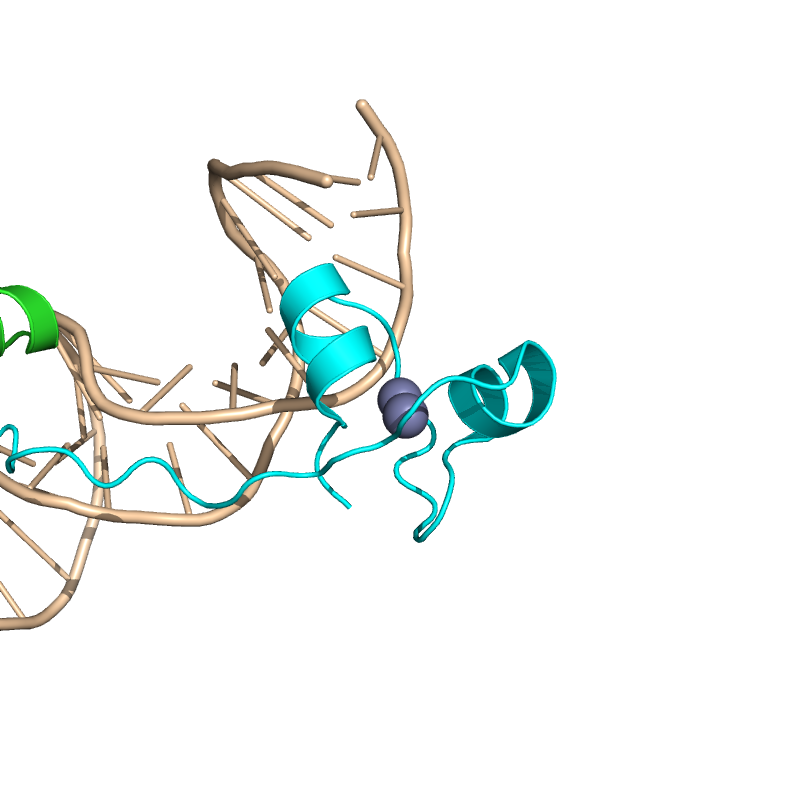

In [2]:
cmds2run = '''cmd.fetch('1d66');cmd.zoom()
cmd.set_view (\
     "0.525620461,   -0.152837604,   -0.836876869,\
    -0.682576001,   -0.662907958,   -0.307641536,\
    -0.507752895,    0.732934058,   -0.452761710,\
     0.000000000,    0.000000000, -158.795608521,\
    29.419000626,   19.603000641,   10.395999908,\
   117.110687256,  200.480606079,  -20.000000000" )
cmd.set ("ray_opaque_background", 0)
cmd.bg_color ("white")
cmd.set ("cartoon_fancy_helices", 1)
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")
cmd.show ("cartoon", "all")
cmd.util.cbc()
cmd.show ("sphere", "metals")
def hex_to_rgb(value):
    #based on https://stackoverflow.com/a/214657/8508004
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
cmd.set_color ("ion_color", [*hex_to_rgb("#7D80B0")])
cmd.color ("ion_color", "metals")
cmd.color ("wheat","polymer.nucleic")
cmd.set ("fog_start", 0.80)
cmd.png('1d66improved.png', 800, 800, dpi=300, ray=1)
'''
script_txt = init_block + cmds2run
%store script_txt > script_o.py
!pymol -cq script_o.py
from IPython.display import Image
Image("1d66improved.png")

If everything went well, then a nice zoom on the cadmium ions of Gal4p bound to DNA (PDB id: 1d66) with a helix jutting into the major groove should be seen.

An additional way I like to code setting the orientation for added usefulness is to do something similar to the following somewhere near the top of my code:

```python
def set_my_view():
    cmd.set_view("-0.618128955, 0.332359225, 0.712325752, -0.207372814, -0.943042099, 0.260065436, 0.758196831, 0.013028201, 0.651856720, 0.000000000, 0.000000000, -661.349548340, 53.364715576, -2.287246704, 2.716659546, 548.118957520, 774.580017090, -20.00")
set_my_view()
```

This way if I later, wish to re-apply the orientation as a I build an expanding, complex script, I can just call `set_my_view()` again, and not have to paste in the entire `cmd.set_view` line with many numbers.   
Needing to reapply the orientation can become an issue when you start generating surfaces. The creation of surfaces cause the focus of the view to shift to the center of the newly generated surface, and thus you may wish to frame the subject if your view again after such a step is added.

This code be used to produce m ore compact text to paste into the scripts without the odd spaces and `\` symbols. Just paste your `set_view` results in place of this example code in `text2format`.

In [3]:
text2format='''
set_view (\
     0.525620461,   -0.152837604,   -0.836876869,\
    -0.682576001,   -0.662907958,   -0.307641536,\
    -0.507752895,    0.732934058,   -0.452761710,\
     0.000000000,    0.000000000, -158.795608521,\
    29.419000626,   19.603000641,   10.395999908,\
   117.110687256,  200.480606079,  -20.000000000 )
'''
formatted = "cmd."+text2format.strip().replace(
    "     "," ").replace(
    "   "," ").replace(
    "  "," ").replace("( ",'("').replace(" )",'")')
print(formatted)

cmd.set_view ("0.525620461, -0.152837604, -0.836876869, -0.682576001, -0.662907958, -0.307641536, -0.507752895, 0.732934058, -0.452761710, 0.000000000, 0.000000000, -158.795608521, 29.419000626, 19.603000641, 10.395999908, 117.110687256, 200.480606079, -20.000000000")


----

Return to [the first page](index.ipynb) for a list of the demonstrations available.

----